In [119]:
import numpy as np
import seaborn as sns
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.utils import pad_sequences


### crucial step is to encode the labels to be numeric values in order to deal with it

In [212]:
max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz" 

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))
        
    return dig_lst
text=encode_to_labels('shaimaa')
print(text)

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78
[70, 59, 52, 60, 64, 52, 52]


### Data Description
- The database contains forms of unconstrained handwritten text, which were scanned at a resolution of 300dpi and saved as PNG images with 256 gray levels. The figure below provides samples of a complete form, a text line and some extracted words.
Characteristics
The IAM Handwriting Database 3.0 is structured as follows:
- 657 writers contributed samples of their handwriting
- 1'539 pages of scanned text
- 5'685 isolated and labeled sentences
- 13'353 isolated and labeled text lines
- 115'320 isolated and labeled words
- The words have been extracted from pages of scanned text using an automatic segmentation scheme and were verified manually. The segmentation scheme has been developed at our institute


### Extend the model to detect words 

- The LSTM layers are used to capture sequential information, which can be helpful when the task involves recognizing words or sequences of characters. 

   In the case of word detection, the LSTM layers could learn to understand the spatial arrangement of characters that form words.

In [171]:
import cv2
import numpy as np

def process_image(img):
    # You can implement your own image preprocessing here
    # For a simple example, resizing the image to a fixed size
    return cv2.resize(img, (width, height))

max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz" 

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))
        
    return dig_lst


width, height = 100, 32

# Mapping characters to numerical values
char_to_num = {char: idx for idx, char in enumerate("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")}

# Lists to store X (images) and Y (labels)
# Lists to store X (images) and Y (labels)
X = []
Y = []
with open('D:\DeepLearning\CodeAlpha_Project_Name\HandWrittenCharacterRecognition\Dataset\iam_words\words.txt') as f:
    contents = f.readlines()

lines = [line.strip() for line in contents][18:]
# Process each line in the ASCII file
for index, line in enumerate(lines):
    splits = line.split(' ')
    # Check if there are at least 2 elements in splits
    if len(splits) < 2:
        print(f"Skipping line: {line}")
        # Append a placeholder label for the skipped line
        X.append(np.zeros((height, width), dtype=np.uint8))
        Y.append([0])
        continue

    status = splits[1]
    if status == 'ok':
        word_id = splits[0]
        word = "".join(splits[8:])
        splits_id = word_id.split('-')
        
        filepath = 'D:\DeepLearning\CodeAlpha_Project_Name\HandWrittenCharacterRecognition\Dataset\iam_words\words/{}/{}-{}/{}.png'.format(splits_id[0], 
                                                  splits_id[0], 
                                                  splits_id[1], 
                                                  word_id)
        # Process the image
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error loading image {word_id}")
            continue
       
        try:
            img = process_image(img)
        except Exception as e:
            print(f"Error processing image {word_id}: {e}")
            continue

        # Process the label
        try:
            label = encode_to_labels(word)
        except Exception as e:
            print(f"Error encoding label for {word_id}: {e}")
            continue

        # Debugging prints
        print(f"Index: {index}, Word: {word}, Label: {label}")
       
        X.append(img)
        Y.append(label)

Y_padded = pad_sequences(Y, padding='post', value=-1)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y_padded)

# Print lengths of lists in Y
for i, label in enumerate(Y):
    # Check if the index is within the range of train_original_text
    if i < len(train_original_text):
        print(f"Index: {i}, Word: {train_original_text[i]}, Label: {len(label)}")
    else:
        print(f"Index: {i}, Word: (Out of Range), Label: {len(label)}")

# Print the shapes of X and Y
print("Shape of X (images):", X.shape)
print("Shape of Y (labels):", Y.shape)

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78
Index: 0, Word: A, Label: [26]
Index: 1, Word: MOVE, Label: [38, 40, 47, 30]
Index: 2, Word: to, Label: [71, 66]
Index: 3, Word: stop, Label: [70, 71, 66, 67]
Index: 4, Word: Mr., Label: [38, 69, 11]
Index: 5, Word: Gaitskell, Label: [32, 52, 60, 71, 70, 62, 56, 63, 63]
Index: 6, Word: from, Label: [57, 69, 66, 64]
Index: 7, Word: nominating, Label: [65, 66, 64, 60, 65, 52, 71, 60, 65, 58]
Index: 8, Word: any, Label: [52, 65, 76]
Index: 9, Word: more, Label: [64, 66, 69, 56]
Index: 10, Word: Labour, Label: [37, 52, 53, 66, 72, 69]
Index: 11, Word: life, Label: [63, 60, 57, 56]
Index: 12, Word: Peers, Label: [41, 56, 56, 69, 70]
Index: 13, Word: is, Label: [60, 70]
Index: 14, Word: to, Label: [71, 66]
Index: 15, Word: be, Label: [53, 56]
Index: 16, Word: made, Label: [64, 52, 55, 56]
Index: 17, Word: at, Label: [52, 71]
Index: 18, Word: a, Label: [52]
Index: 19, Word: meeting, Label: [64, 56, 56, 71, 60, 6

In [184]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape, TimeDistributed
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import cv2


X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape input data to include channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
# Print the shape of input data
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)

# Check the sequence length in your data
print("Sequence length in Y_train:", Y_train.shape[1])
print("Sequence length in Y_valid:", Y_valid.shape[1])
# Split the data into training and validation sets
Y_train_padded = pad_sequences(Y_train, maxlen=32, padding='post', truncating='post')
Y_valid_padded = pad_sequences(Y_valid, maxlen=32, padding='post', truncating='post')

# One-hot encode the labels
Y_train_padded_one_hot = to_categorical(Y_train_padded, num_classes=len(char_list) + 1)
Y_valid_padded_one_hot = to_categorical(Y_valid_padded, num_classes=len(char_list) + 1)


# Define the model architecture
model = Sequential()

# Convolutional layers for image feature extraction
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(height, width, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

# Flatten the output for connecting to an LSTM layer
model.add(Flatten())

model.add(Reshape((32, -1)))  # Adjust this line based on your actual sequence length

# LSTM layer for sequence modeling
model.add(LSTM(64, return_sequences=True))
model.add(TimeDistributed(Dense(64, activation='relu')))
model.add(LSTM(len(char_list) + 1, return_sequences=True))  # +1 for the extra class
model.add(TimeDistributed(Dense(len(char_list) + 1, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Print shapes before training
print("Model Output Shape:", model.predict(X_train).shape)
print("Y_train_padded Shape:", Y_train_padded.shape)
# Train the model
history = model.fit(X_train, Y_train_padded,
                    epochs=10, batch_size=16,
                    validation_data=(X_valid, Y_valid_padded),
                    verbose=1)


X_train shape: (30644, 32, 100, 1)
X_valid shape: (7661, 32, 100, 1)
Sequence length in Y_train: 19
Sequence length in Y_valid: 19
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_226 (Conv2D)         (None, 30, 98, 32)        320       
                                                                 
 max_pooling2d_223 (MaxPool  (None, 15, 49, 32)        0         
 ing2D)                                                          
                                                                 
 dropout_219 (Dropout)       (None, 15, 49, 32)        0         
                                                                 
 conv2d_227 (Conv2D)         (None, 13, 47, 64)        18496     
                                                                 
 max_pooling2d_224 (MaxPool  (None, 6, 23, 64)         0         
 ing2D)                                               

### Testing on Random Image from the dataset

1/1 [==============================] - 0s 22ms/step
True Label: [45 59 56 76 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Predicted Label: [[71 59 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78 78  0  0  0  0  0
   0  0  0  0  0  0  0  0]]


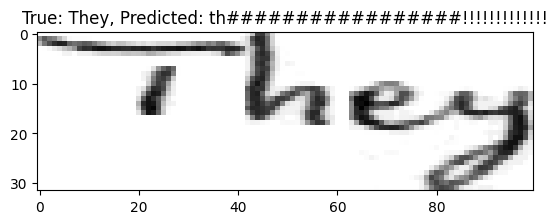

In [211]:
import matplotlib.pyplot as plt

# Choose a random sample from your dataset
sample_index = np.random.randint(0, len(X))

# Get the prediction for the chosen sample
sample_image = X[sample_index]
sample_label = Y[sample_index]

# Reshape the image for prediction
sample_image = np.expand_dims(sample_image, axis=0)

# Make predictions using the trained model
predictions = model.predict(sample_image)

# Choose the index with the maximum probability as the predicted label
predicted_label = np.argmax(predictions, axis=-1)

# Print the true and predicted labels
print("True Label:", sample_label)
print("Predicted Label:", predicted_label)

# Decode the labels back to characters
true_text = "".join([char_list[idx] if 0 <= idx < len(char_list) else '#' for idx in sample_label if idx != -1])
predicted_text = "".join([char_list[idx] if 0 <= idx < len(char_list) else '#' for idx in predicted_label[0] if idx != -1])


# Plot the image
plt.imshow(sample_image.reshape(1, height, width, 1)[0, :, :, 0], cmap='gray')
plt.title(f"True: {true_text}, Predicted: {predicted_text}")
plt.show()


In [ ]:
print(X)

[[[249 249 249 ... 251 251 251]
  [245 245 245 ... 251 251 251]
  [245 245 244 ... 251 251 251]
  ...
  [103 103 114 ... 131 146 146]
  [125 125 139 ... 227 234 234]
  [157 157 169 ... 240 242 242]]

 [[255 255 255 ... 227 240 246]
  [252 249 202 ... 127 161 214]
  [251 213  95 ...  50  54  82]
  ...
  [ 94  64 152 ... 255 255 255]
  [ 91  91 218 ... 255 255 255]
  [131 177 243 ... 255 255 255]]

 [[251 251 251 ... 255 255 255]
  [251 250 249 ... 255 255 255]
  [251 251 250 ... 255 255 255]
  ...
  [255 255 255 ... 244 245 245]
  [255 255 255 ... 245 246 249]
  [255 255 255 ... 249 249 250]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 252 251 251]
  [255 255 255 ... 246 245 245]
  ...
  [152 152 147 ... 174 174 174]
  [177 177 172 ... 181 182 182]
  [192 192 187 ... 185 187 187]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 254 255 255]
  [255 255 255 ... 249 246 246]
  ...
  [244 244 229 ... 255 255 255]
  [244 244 228 ... 255 255 255]
  [247 244 244 ... 255 255 2

In [ ]:
print(Y)

[[26], [38, 40, 47, 30], [71, 66], [70, 71, 66, 67], [38, 69, 11], [32, 52, 60, 71, 70, 62, 56, 63, 63], [57, 69, 66, 64], [65, 66, 64, 60, 65, 52, 71, 60, 65, 58], [52, 65, 76], [64, 66, 69, 56], [37, 52, 53, 66, 72, 69], [63, 60, 57, 56], [41, 56, 56, 69, 70], [60, 70], [71, 66], [53, 56], [64, 52, 55, 56], [52, 71], [52], [64, 56, 56, 71, 60, 65, 58], [66, 57], [37, 52, 53, 66, 72, 69], [67, 72, 71], [55, 66, 74, 65], [52], [69, 56, 70, 66, 63, 72, 71, 60, 66, 65], [66, 65], [71, 59, 56], [70, 72, 53, 61, 56, 54, 71], [32, 69, 60, 57, 57, 60, 71, 59, 70], [9], [38, 41], [57, 66, 69], [38, 52, 65, 54, 59, 56, 70, 71, 56, 69], [30, 75, 54, 59, 52, 65, 58, 56], [11], [26], [38, 40, 47, 30], [71, 66], [70, 71, 66, 67], [38, 69, 11], [32, 52, 60, 71, 70, 62, 56, 63, 63], [57, 69, 66, 64], [65, 66, 64, 60, 65, 52, 71, 60, 65, 58], [52, 65, 76], [64, 66, 69, 56], [37, 52, 53, 66, 72, 69], [63, 60, 57, 56], [41, 56, 56, 69, 70], [60, 70], [71, 66], [53, 56], [64, 52, 55, 56], [52, 71], [52]

In [ ]:
print(Y_train)

[[ 9  0  0 ...  0  0  0]
 [52 71  0 ...  0  0  0]
 [65 66 71 ...  0  0  0]
 ...
 [55 60 56 ...  0  0  0]
 [67 63 52 ...  0  0  0]
 [74 60 63 ...  0  0  0]]


In [214]:
num_classes = len(char_list)
print(num_classes)

78
